In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load and inspect satellite $CO_2$ data

In [32]:
# load csv
df = pd.read_csv("../datasets/preprocessed_data/monthly_co2_airs_nlis.csv")
# inspect dataframe
print(len(df))
df

3233073


,Unnamed: 0,latitude,day,month,year,longitude,time,solar_zenith_angle,sensor_zenith_angle,co2_quality_flag,value,co2_uncertainty,gas,type
0,0,17.33,1,4,2003,9.27,1.049159e+09,-999.0,-999.0,0,375.20,-999.0,co2,satellite
1,1,17.43,1,4,2003,8.47,1.049159e+09,-999.0,-999.0,0,369.69,-999.0,co2,satellite
2,2,16.90,1,4,2003,8.77,1.049159e+09,-999.0,-999.0,0,377.90,-999.0,co2,satellite
3,3,16.06,1,4,2003,11.34,1.049159e+09,-999.0,-999.0,0,379.14,-999.0,co2,satellite
4,4,16.57,1,4,2003,7.41,1.049159e+09,-999.0,-999.0,0,379.25,-999.0,co2,satellite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233068,3233068,-19.83,31,7,2007,38.29,1.185922e+09,-999.0,-999.0,1,386.97,-999.0,co2,satellite
3233069,3233069,-19.73,31,7,2007,37.51,1.185922e+09,-999.0,-999.0,1,383.39,-999.0,co2,satellite
3233070,3233070,-19.50,31,7,2007,35.92,1.185922e+09,-999.0,-999.0,1,378.78,-999.0,co2,satellite
3233071,3233071,-19.37,31,7,2007,35.05,1.185922e+09,-999.0,-999.0,1,375.49,-999.0,co2,satellite


In [33]:
#df = df[(df["latitude"] >= 0.)]
df = df[(df["longitude"] <= 0.)]

## Comparison ground-based vs. satellite data
### preprocess ground-based data
+ average $CO_2$ value over all additional variables (e.g., station)

In [34]:
def preprocess_grba_c02(dat, method):
    # extract years 2003-2007
    gr_co2_03_07 = dat.loc[dat["year"].isin([2003, 2004, 2005, 2006, 2007])]
    # extract relevant columns
    gr_co2_03_07 = gr_co2_03_07.groupby(["gas","year","month"])["value"].mean().reset_index()
    gr_co2_03_07["type"]=method
    gr_co2_03_07[["gas", "type"]] = gr_co2_03_07[["gas", "type"]].astype(str)
    return gr_co2_03_07

insitu_co2 = pd.read_csv("../datasets/preprocessed_data/monthly_co2_in-situ.csv")
flask_co2 = pd.read_csv("../datasets/preprocessed_data/monthly_co2_surface-flask.csv")

prep_insitu_co2 = preprocess_grba_c02(insitu_co2, "insitu")
prep_flask_co2 = preprocess_grba_c02(flask_co2, "flask")

prep_insitu_co2.head()

,gas,year,month,value,type
0,co2,2003,1,375.0875,insitu
1,co2,2003,2,375.6400,insitu
2,co2,2003,3,376.2125,insitu
3,co2,2003,4,376.6300,insitu
4,co2,2003,5,376.8575,insitu


### preprocess satellite data
+ average $CO_2$ data across month

In [35]:
df = df.rename(columns={"co2": "value"})
sat_co2_03_07 = df.groupby(["gas","year", "month", "type"])["value"].mean().reset_index()
sat_co2_03_07["gas"]="co2"
sat_co2_03_07["type"]="satellite"
sat_co2_03_07[["gas", "type"]] = sat_co2_03_07[["gas", "type"]].astype(str)

sat_co2_03_07.head()

,gas,year,month,type,value
0,co2,2003,4,satellite,374.860294
1,co2,2003,5,satellite,374.524825
2,co2,2003,6,satellite,374.899548
3,co2,2003,7,satellite,375.427880
4,co2,2003,8,satellite,374.907702


### join ground-based and satellite data

In [36]:
dat_joined = pd.concat([prep_insitu_co2, prep_flask_co2, sat_co2_03_07])
dat_joined["year-month"] = dat_joined["year"].astype(str)+"-"+dat_joined["month"].astype(str)

# save as csv
dat_joined.to_csv("../datasets/preprocessed_data/joined_monthly_co2_airs_nils.csv")

# inspect data
dat_joined.head()

,gas,year,month,value,type,year-month
0,co2,2003,1,375.0875,insitu,2003-1
1,co2,2003,2,375.6400,insitu,2003-2
2,co2,2003,3,376.2125,insitu,2003-3
3,co2,2003,4,376.6300,insitu,2003-4
4,co2,2003,5,376.8575,insitu,2003-5


### plot joined data

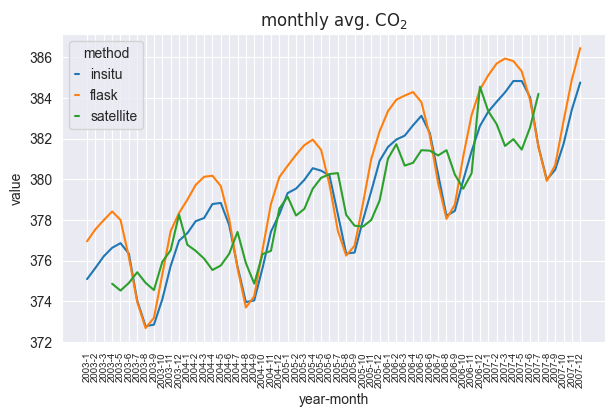

In [37]:
_, axs = plt.subplots(1, 1, figsize=(7,4))
sns.lineplot(data=dat_joined, x="year-month", y="value", hue="type", ax=axs)
axs.tick_params(axis="x", rotation=90, labelsize=7)
axs.set_title(r"monthly avg. $CO_2$")
axs.legend(title="method", handlelength=0.3)
plt.show()

In [18]:
import xarray as xr
xr.load_dataset("../datasets/downloads/30e7ca145a49496e137a0ce5b6c1295/20030411-C3S-L2_CO2_midtrop-GHG_PRODUCTS-AIRS-AQUA-NLIS-DAILY-v3.0.nc")

<xarray.Dataset> Size: 1MB
Dimensions:               (sounding_dim: 2139, layer_dim: 39, level_dim: 40)
Dimensions without coordinates: sounding_dim, layer_dim, level_dim
Data variables:
    latitude              (sounding_dim) float32 9kB 16.59 16.15 ... -19.85
    longitude             (sounding_dim) float32 9kB 26.89 22.74 ... 30.86 30.06
    time                  (sounding_dim) datetime64[ns] 17kB 2003-04-11 ... 2...
    solar_zenith_angle    (sounding_dim) float32 9kB nan nan nan ... nan nan nan
    sensor_zenith_angle   (sounding_dim) float32 9kB nan nan nan ... nan nan nan
    co2_quality_flag      (sounding_dim) int8 2kB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    co2                   (sounding_dim) float32 9kB 380.2 376.2 ... 371.4 376.1
    co2_uncertainty       (sounding_dim) float32 9kB nan nan nan ... nan nan nan
    co2_averaging_kernel  (sounding_dim, layer_dim) float32 334kB 0.001 ... 0.0
    pressure_levels       (sounding_dim, level_dim) float32 342kB 0.05 ... 1....
    pressure_weight       (sounding_dim, layer_dim) float32 334kB 0.07 ... 984.2
Attributes: (12/36)
    title:                     NLIS
    institution:               Laboratoire de Météorologie Dynamique (LMD) - ...
    source:                    
    history:                   
    reference:                 Crevoisier et al., ACP, 2009, 2013
    tracking_id:               d423b344-78d9-4877-905d-8a35e8974e5f
    ...                        ...
    time_coverage_resolution:  P1D
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open access
    platform:                  Aqua
    sensor:                    AIRS
    spatial_resolution:

In [13]:
!ncdump --help

Der Befehl "ncdump" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [16]:
from netCDF4 import Dataset

Dataset("../datasets/downloads/30e7ca145a49496e137a0ce5b6c1295/20030411-C3S-L2_CO2_midtrop-GHG_PRODUCTS-AIRS-AQUA-NLIS-DAILY-v3.0.nc")

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: NLIS
    institution: Laboratoire de Météorologie Dynamique (LMD) - CNRS
    source: 
    history: 
    reference: Crevoisier et al., ACP, 2009, 2013
    tracking_id: d423b344-78d9-4877-905d-8a35e8974e5f
    Conventions: CF-1.6
    Product_Version: v3.0
    summary: The non linear inference sheme developed at CNRS-LMD is designed to retrieve mid-tropospheric columns of atmospheric carbon dioxide (CO2) from radiances measured by the AIRS (Atmospheric Infrared Sounder) and AMSU (Advanced Microwave Sounding Unit) instruments onboard the Metop platforms. Retrievals are performed for clear-sky situations over land and sea, by day and night, at the spot resolution.
    keywords: satellite, atmosphere, carbon dioxide
    id: CO2_AIRS_NLIS_v3.0_20030411.nc
    Naming_authority: lmd.fr
    keywords_vocabulary: 
    cdm_data_type: point
    date_created: 20170915T000000Z - Product generated from CNRS-LMD
    